<a href="https://colab.research.google.com/github/AhmedAtya74/Convolution-Neural-Network/blob/main/CNN%20Handwritten%20Digits%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import All Libraries 

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten,MaxPooling2D,Dropout
from sklearn.model_selection import KFold
from keras.utils import np_utils

# CNN

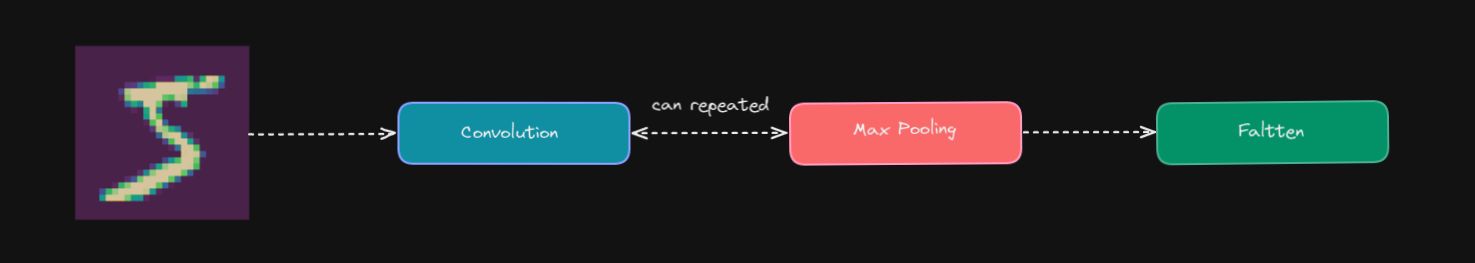

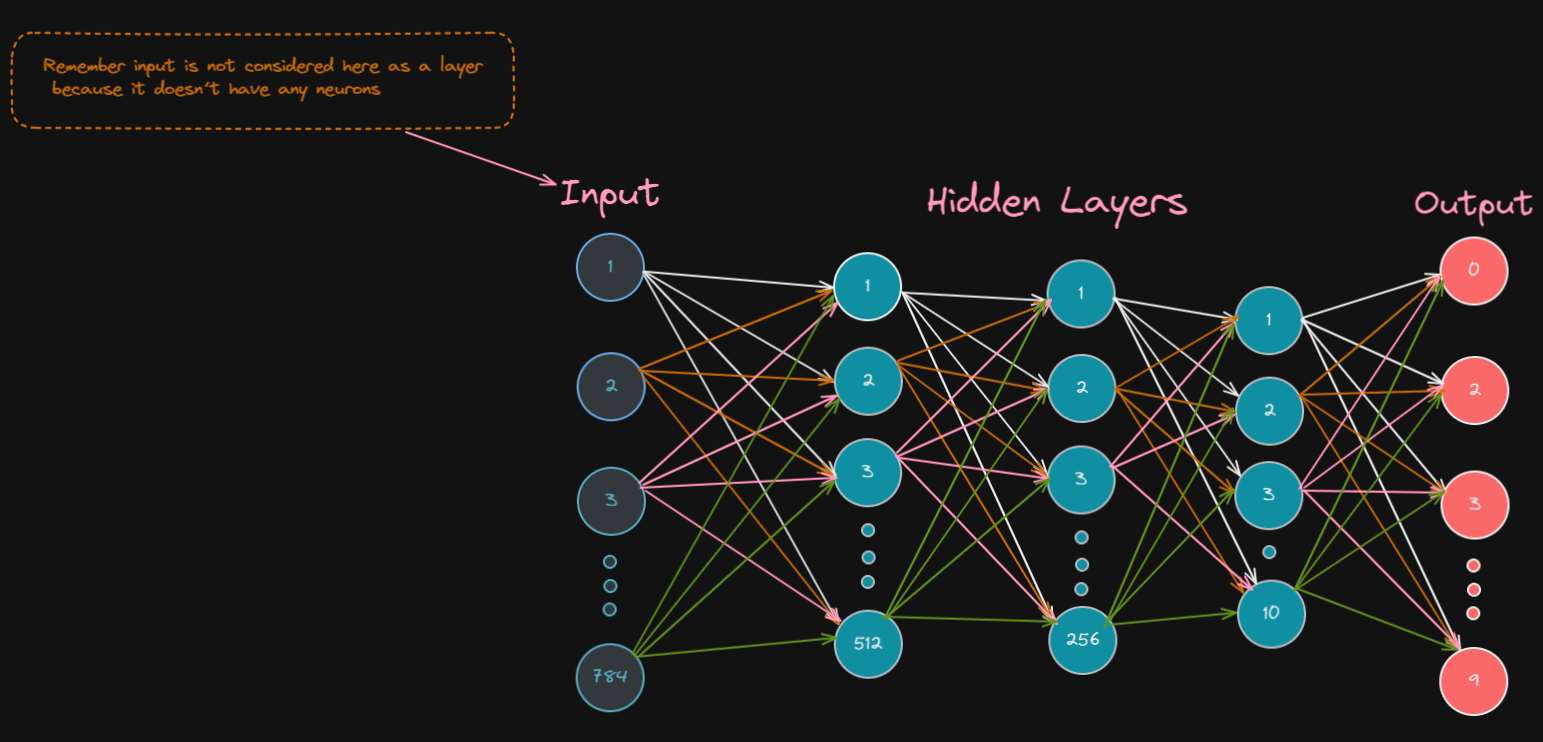

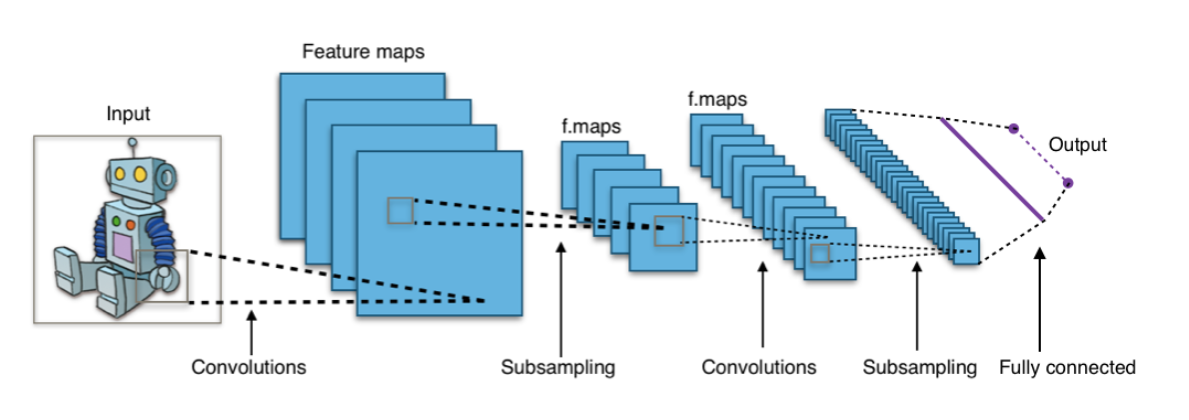

# Load mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Explore & Visualize Data

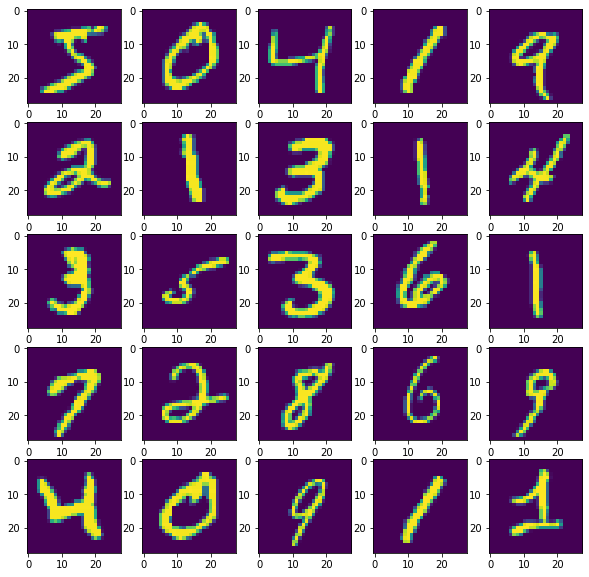

In [ ]:
n_instance = 25
plt.figure(figsize=(10, 10))
for i in range(n_instance):
  plt.subplot(5,5, i + 1)
  plt.grid(False)
  plt.imshow(x_train[i]) 

plt.show()

# Preprocessing 

## Reshape

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

## Convert Datatype of Pixels to Float

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Rescale Pixel Values

In [ ]:
x_train /= 255
x_test /= 255

## Converting output into a layer output

In [ ]:
number_of_classes = 10
yl_train = np_utils.to_categorical(y_train, number_of_classes)
yl_test = np_utils.to_categorical(y_test, number_of_classes)

# Build 1st Convolutional Neural Network Model Architecture

In [ ]:
first_model = Sequential()
first_model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape)) 
first_model.add(Activation('relu')) 
first_model.add(MaxPooling2D(pool_size=(2, 2)))

first_model.add(Flatten())
first_model.add(Dense(128, activation='relu'))
first_model.add(Dropout(0.2))
first_model.add(Dense(10,activation='softmax'))

## Compilation 

In [ ]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Summary

In [ ]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

# Build 2nd Convolutional Neural Network Model Architecture

In [ ]:
second_model = Sequential()
second_model.add(Conv2D(16, kernel_size=(3,3), input_shape=input_shape))
second_model.add(Activation('relu')) 
second_model.add(MaxPooling2D(pool_size=(2, 2)))


second_model.add(Conv2D(32, kernel_size=(3,3))) 
second_model.add(Activation('relu')) 
second_model.add(MaxPooling2D(pool_size=(2, 2)))


second_model.add(Flatten())
second_model.add(Dense(256, activation='relu'))
second_model.add(Dropout(0.3))
second_model.add(Dense(10,activation='softmax'))

## Compilation 

In [ ]:
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Summary

In [ ]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 activation_2 (Activation)   (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                  

# Build 3rd Convolutional Neural Network Model Architecture

In [ ]:
third_model = Sequential()
third_model.add(Conv2D(16, kernel_size=(3,3), input_shape=input_shape))
third_model.add(Activation('relu')) 
third_model.add(MaxPooling2D(pool_size=(3, 3)))

third_model.add(Conv2D(32, kernel_size=(3,3))) 
third_model.add(Activation('relu')) 

third_model.add(Conv2D(32, kernel_size=(3,3))) 
third_model.add(Activation('relu')) 
third_model.add(MaxPooling2D(pool_size=(3, 3)))

third_model.add(Flatten())
third_model.add(Dense(256, activation='relu'))
third_model.add(Dense(128, activation='relu'))
third_model.add(Dropout(0.2))
third_model.add(Dense(10,activation='softmax'))

## Compilation

In [ ]:
third_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Summary

In [ ]:
third_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 activation_4 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          9248      
                                                      

# Build 4th Convolutional Neural Network Model Architecture

In [ ]:
forth_model = Sequential()

forth_model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
forth_model.add(Activation('relu')) 


forth_model.add(Conv2D(32, kernel_size=(3, 3)))
forth_model.add(Activation('relu')) 
forth_model.add(MaxPooling2D(pool_size=(3, 3)))


forth_model.add(Conv2D(64, kernel_size=(3, 3)))
forth_model.add(Activation('relu')) 


forth_model.add(Conv2D(64, kernel_size=(3, 3)))
forth_model.add(Activation('relu')) 
forth_model.add(MaxPooling2D(pool_size=(2, 2)))


forth_model.add(Flatten())
forth_model.add(Dense(512, activation='relu'))
forth_model.add(Dropout(0.3))
forth_model.add(Dense(10,activation='softmax'))

## Compilation

In [ ]:
forth_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Summary

In [ ]:
forth_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 64)          18496     
                                                      

# Cross Validation & Model Evaluation

In [ ]:
def evaluate_model(x_train, y_train, model, n_folds):
  kFold = KFold(n_splits=n_folds, shuffle=True, random_state=1)
  for train_idx, test_idx in kFold.split(x_train):
    Xtrain, Ytrain, Xtest, Ytest = x_train[train_idx], y_train[train_idx], x_train[test_idx], y_train[test_idx]
    model.fit(Xtrain,Ytrain, steps_per_epoch=Xtrain.shape[0])
    res = model.evaluate(Xtest, Ytest, steps=Xtest.shape[0])
    print('Accurcy','= %.4f' % (res[1] * 100.0))


## Model 1 After Appling K-fold

In [ ]:
evaluate_model(x_train, yl_train, first_model, n_folds=5)

12000/12000 [==============================] - 18s 2ms/step - loss: 0.0721 - accuracy: 0.9795
Accurcy = 97.9500
12000/12000 [==============================] - 18s 1ms/step - loss: 0.0604 - accuracy: 0.9837
Accurcy = 98.3667
12000/12000 [==============================] - 18s 1ms/step - loss: 0.0443 - accuracy: 0.9862
Accurcy = 98.6167
12000/12000 [==============================] - 18s 2ms/step - loss: 0.0433 - accuracy: 0.9877
Accurcy = 98.7667
12000/12000 [==============================] - 18s 1ms/step - loss: 0.0360 - accuracy: 0.9908
Accurcy = 99.0833


## Model 2 After Appling K-fold

In [ ]:
evaluate_model(x_train, yl_train, second_model, n_folds=4)

15000/15000 [==============================] - 23s 2ms/step - loss: 0.0897 - accuracy: 0.9785
Accurcy = 97.8467
15000/15000 [==============================] - 23s 2ms/step - loss: 0.0938 - accuracy: 0.9760
Accurcy = 97.6000
15000/15000 [==============================] - 23s 2ms/step - loss: 0.0508 - accuracy: 0.9848
Accurcy = 98.4800
15000/15000 [==============================] - 23s 2ms/step - loss: 0.0481 - accuracy: 0.9880
Accurcy = 98.8000


## Model 3 After Appling K-fold

In [ ]:
evaluate_model(x_train, yl_train, third_model, n_folds=3)

20000/20000 [==============================] - 29s 1ms/step - loss: 0.2035 - accuracy: 0.9518
Accurcy = 95.1800
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1457 - accuracy: 0.9639
Accurcy = 96.3900
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1120 - accuracy: 0.9710
Accurcy = 97.0950


## Model 4 After Appling K-fold

In [ ]:
evaluate_model(x_train, yl_train, forth_model, n_folds=4)

15000/15000 [==============================] - 30s 2ms/step - loss: 0.0968 - accuracy: 0.9743
Accurcy = 97.4267
15000/15000 [==============================] - 30s 2ms/step - loss: 0.1037 - accuracy: 0.9729
Accurcy = 97.2867
15000/15000 [==============================] - 32s 2ms/step - loss: 0.1091 - accuracy: 0.9742
Accurcy = 97.4200
15000/15000 [==============================] - 30s 2ms/step - loss: 0.1077 - accuracy: 0.9749
Accurcy = 97.4867


# After 2 hours of running 4 models

## Reaction

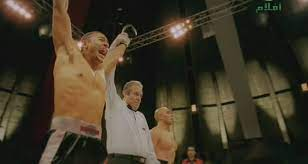